# Implementing Convolutional Neural Networks

First, Let us compare with the shallow NN, ie. a MLP on FMNIST dataset

## Shallow Neural Network

### Defining Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint

### Data preprocessing

In [2]:
fmnist = tf.keras.datasets.fashion_mnist
(X_train,y_train), (X_test,y_test) = fmnist.load_data()

In [3]:
X_train, X_test = X_train / 255, X_test /  255

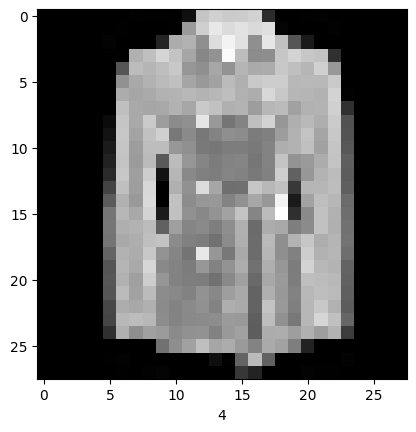

In [4]:
indx = randint(0, len(X_train))
rand_img = X_train[indx]
rand_lbl = y_train[indx]

plt.xlabel(rand_lbl)
plt.imshow(rand_img, cmap='gray')

### Model initialization

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.sigmoid)
])

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Model Training

In [24]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.5192 - accuracy: 0.8206
Epoch 2/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.3917 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.3503 - accuracy: 0.8731
Epoch 4/10
1875/1875 [==============================] - 1s 611us/step - loss: 0.3237 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 1s 611us/step - loss: 0.3038 - accuracy: 0.8891
Epoch 6/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.2875 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 1s 626us/step - loss: 0.2756 - accuracy: 0.8972
Epoch 8/10
1875/1875 [==============================] - 1s 617us/step - loss: 0.2643 - accuracy: 0.9012
Epoch 9/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.2527 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 1s 621u

### Model Testing

In [25]:
result = model.evaluate(X_test,y_test)
print(result)

313/313 [==============================] - 0s 432us/step - loss: 0.3506 - accuracy: 0.8847
[0.35062354803085327, 0.8847000002861023]


88% accuracy on test set is achieved, thus giving us a hint to use a better model to achieve more accuracy

## Convolutional Neural Network

We will define 2 convolutional & 2 pooling layers in out architecture

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(3,3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5083 - accuracy: 0.8168
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3298 - accuracy: 0.8807
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2870 - accuracy: 0.8941
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2609 - accuracy: 0.9031
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2410 - accuracy: 0.9114
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2241 - accuracy: 0.9178
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2103 - accuracy: 0.9222
Epoch 8/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1967 - accuracy: 0.9276
Epoch 9/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1839 - accuracy: 0.9311
Epoch 10/20
1875/1875 [==============================] - 24s 13ms

In [8]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3582 - accuracy: 0.9086


[0.35816165804862976, 0.9085999727249146]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3